In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vegetable_nutrition_dataset.csv')
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [9]:

## Prepare data
X = df.drop(["Name", "Category"], axis=1)
y = df["Category"]

## Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

## Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluation Metrics (safe version with zero_division to suppress warnings)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n🔍 Evaluation Metrics")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))




🔍 Evaluation Metrics
Accuracy: 0.60
Precision: 0.50
Recall: 0.60

📊 Classification Report:
              precision    recall  f1-score   support

 Cruciferous       0.00      0.00      0.00         0
       Fruit       0.50      1.00      0.67         1
       Leafy       0.00      0.00      0.00         2
        Root       1.00      1.00      1.00         2

    accuracy                           0.60         5
   macro avg       0.38      0.50      0.42         5
weighted avg       0.50      0.60      0.53         5



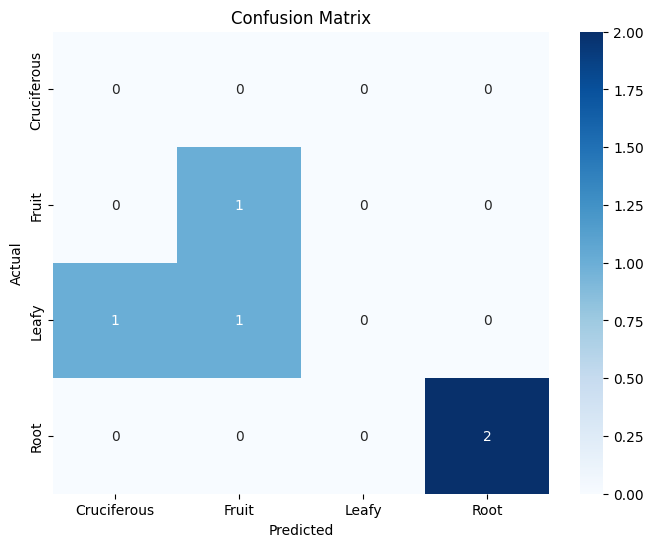

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


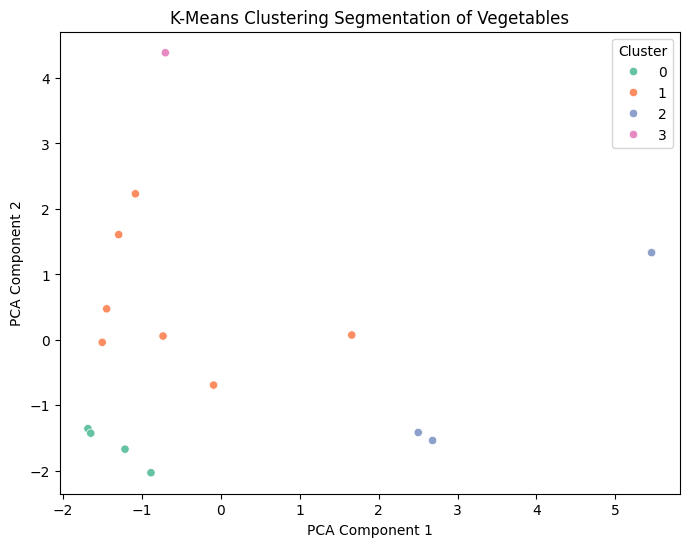

In [12]:

## Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

## Attach clusters to dataframe
df['Cluster'] = cluster_labels

## PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set2')
plt.title("K-Means Clustering Segmentation of Vegetables")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()